___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [129]:
try:
    import jupyter_black
    jupyter_black.load()
except ImportError:
    print("You can safely ignore this message.")

You can safely ignore this message.


In [130]:
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

In [131]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
from tensorflow import keras
from keras.utils import to_categorical
plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Set it to None to display all columns in the dataframe
pd.set_option("display.max_columns", None)

In [132]:
# Get tensorflow version
import tensorflow as tf

tf.__version__

'2.14.0'

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [133]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [134]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [135]:
seed = 42
import os
import random

os.environ["TF_DETERMINISTIC_OPS"] = "1"
tf.keras.utils.set_random_seed(seed)
os.environ['PYTHONHASHSEED']=str(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)


In [136]:
x_train.shape



(60000, 28, 28)

In [137]:
y_train.shape

(60000,)

In [138]:
x_test.shape

(10000, 28, 28)

In [139]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

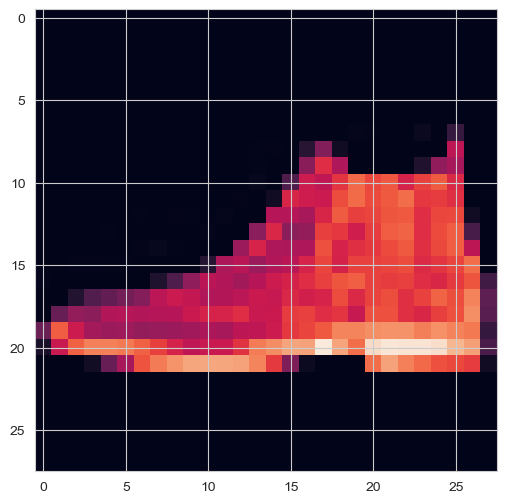

In [140]:
plt.imshow(x_test[0]);

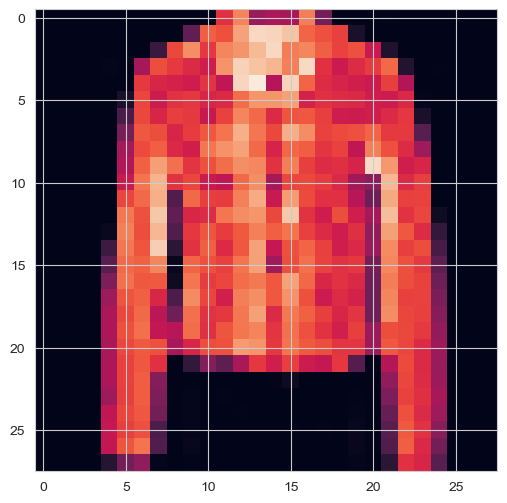

In [141]:
plt.imshow(x_test[10]);

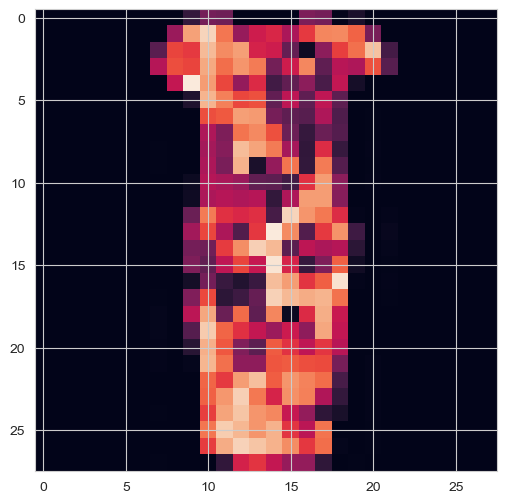

In [142]:
plt.imshow(x_test[100]);

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [143]:
# Normalize image pixels

x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train /= 255
x_test /= 255

In [144]:
x_train[100].min()

0.0

In [145]:
x_train[100].max()

1.0

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [146]:
# reshape dataset to have a single channel
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [172]:
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
Y_test.shape

(10000, 10)

In [178]:
print(Y_train)

[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [179]:
print(y_test)

[9 2 1 ... 8 1 5]


# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [152]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, MaxPooling2D

In [153]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3, 3), input_shape=( 28, 28, 1), activation="relu", padding="same",))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [154]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 28)        0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 5488)              0         
                                                                 
 dense_9 (Dense)             (None, 128)               702592    
                                                                 
 dense_10 (Dense)            (None, 10)                1290      
                                                                 
Total params: 704162 (2.69 MB)
Trainable params: 704162 (2.69 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [155]:
from tensorflow.keras.callbacks import EarlyStopping

In [156]:
early_stop = EarlyStopping(monitor="val_loss", patience=4, restore_best_weights=True)

In [157]:
model.fit(
    x_train,
    Y_train,
    batch_size=32,
    epochs=50,
    validation_data=(x_test, Y_test),
    callbacks=[early_stop],
)

Epoch 1/50


1875/1875 [==============================] - 31s 15ms/step - loss: 0.4050 - accuracy: 0.8550 - val_loss: 0.3454 - val_accuracy: 0.8778
Epoch 2/50
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2704 - accuracy: 0.9030 - val_loss: 0.2903 - val_accuracy: 0.8977
Epoch 3/50
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2295 - accuracy: 0.9172 - val_loss: 0.2649 - val_accuracy: 0.9041
Epoch 4/50
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2007 - accuracy: 0.9274 - val_loss: 0.2904 - val_accuracy: 0.9042
Epoch 5/50
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1811 - accuracy: 0.9347 - val_loss: 0.2754 - val_accuracy: 0.9029
Epoch 6/50
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1633 - accuracy: 0.9406 - val_loss: 0.2748 - val_accuracy: 0.9050
Epoch 7/50
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1473 - accuracy: 0.9469 - val_loss: 0.2816 - val_accura

In [158]:
model.metrics_names

['loss', 'accuracy']

In [159]:
summary = pd.DataFrame(model.history.history)
summary

,loss,accuracy,val_loss,val_accuracy
0,0.405,0.855,0.345,0.878
1,0.270,0.903,0.290,0.898
2,0.229,0.917,0.265,0.904
3,0.201,0.927,0.290,0.904
4,0.181,0.935,0.275,0.903
5,0.163,0.941,0.275,0.905
6,0.147,0.947,0.282,0.907


**TASK 7: Plot values of metrics you used in your model.**

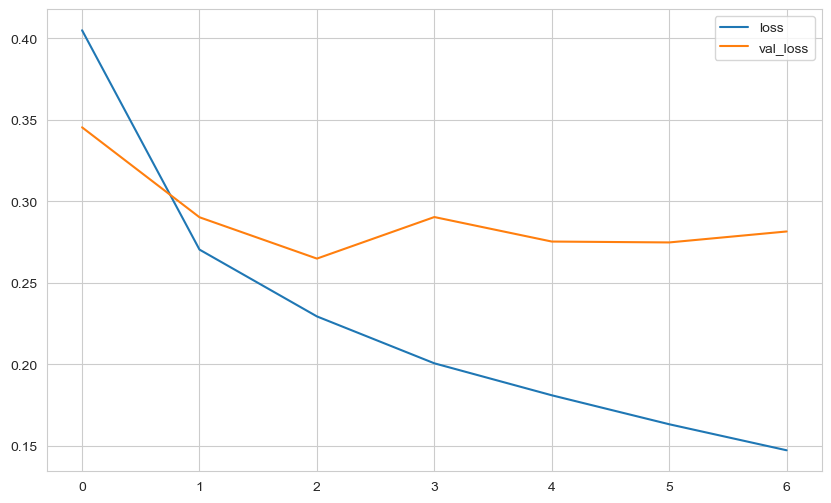

In [160]:
summary[["loss", "val_loss"]].plot()
plt.show()

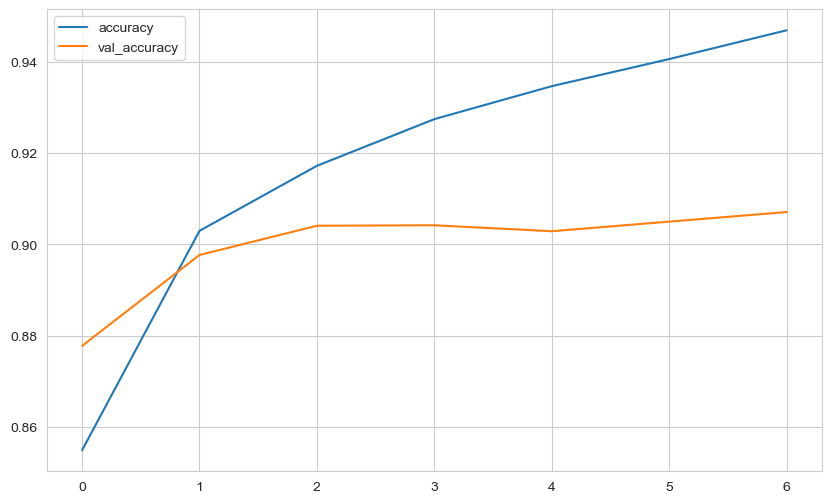

In [161]:
summary[["accuracy", "val_accuracy"]].plot()
plt.show()

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [162]:
from sklearn.metrics import classification_report, confusion_matrix

In [183]:
model.evaluate(x_test, Y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.2649 - accuracy: 0.9041


[0.26491472125053406, 0.9041000008583069]

In [184]:
score = model.evaluate(x_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.26491472125053406
Test accuracy: 0.9041000008583069


In [185]:
pred = model.predict(x_test)
pred

313/313 [==============================] - 2s 7ms/step


array([[1.90838250e-06, 7.95083537e-08, 2.44728676e-06, ...,
        3.10100242e-03, 4.98848613e-06, 9.96782422e-01],
       [1.10738969e-04, 1.81594174e-13, 9.99856710e-01, ...,
        3.67340429e-11, 8.40549089e-11, 4.04180821e-11],
       [1.66069682e-07, 9.99999583e-01, 7.21620053e-09, ...,
        6.81798529e-09, 1.93251886e-08, 4.58306101e-11],
       ...,
       [1.17007694e-04, 1.96896699e-09, 1.83529060e-04, ...,
        7.06571245e-06, 9.97700930e-01, 7.72547608e-08],
       [2.51709906e-07, 9.99970973e-01, 3.76906648e-08, ...,
        1.42058312e-07, 2.46416469e-08, 1.12984623e-07],
       [4.81322082e-03, 3.88006447e-05, 1.32867070e-02, ...,
        1.32749528e-01, 1.00911550e-01, 8.39869026e-03]], dtype=float32)

In [187]:
Y_pred = np.argmax(pred, axis=1)
Y_pred

array([9, 2, 1, ..., 8, 1, 5])

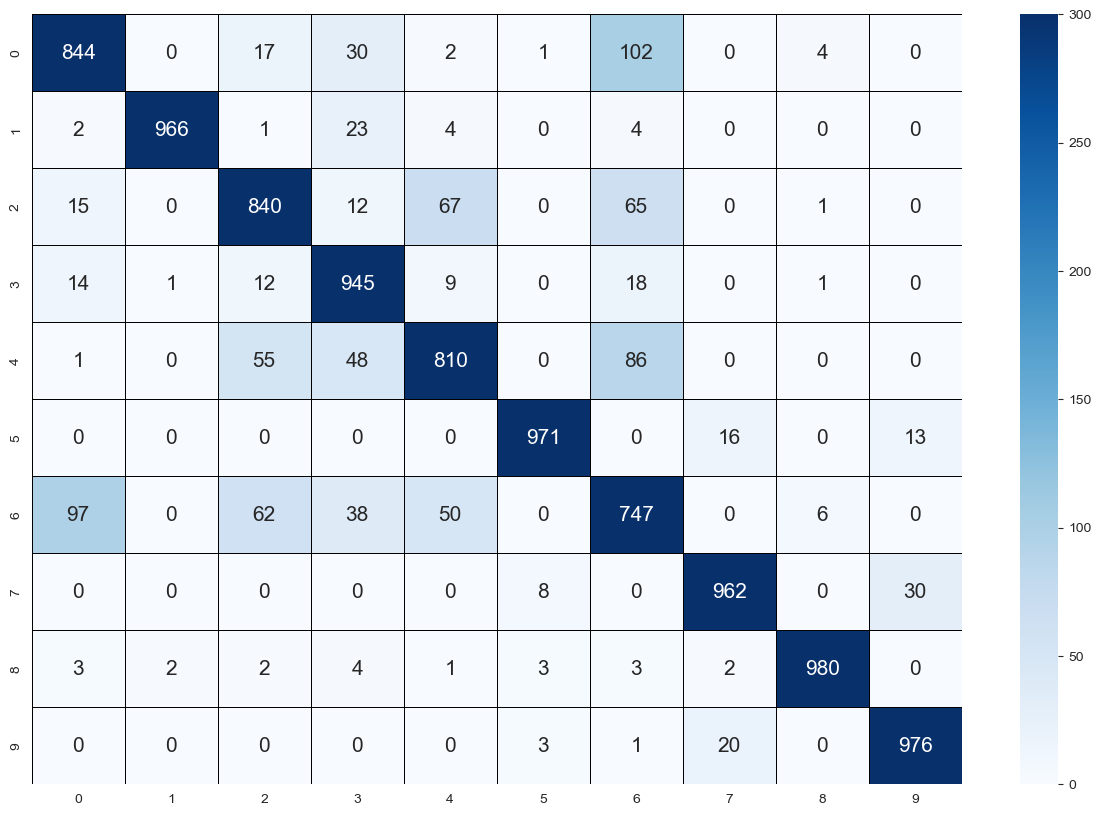

In [192]:
plt.figure(figsize=(15, 10))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    cmap="Blues",
    linewidths=0.5,
    linecolor="black",
    fmt="g",
    annot_kws={"size": 15},
    vmax=300,
)
plt.show()

In [193]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1000
           1       1.00      0.97      0.98      1000
           2       0.85      0.84      0.84      1000
           3       0.86      0.94      0.90      1000
           4       0.86      0.81      0.83      1000
           5       0.98      0.97      0.98      1000
           6       0.73      0.75      0.74      1000
           7       0.96      0.96      0.96      1000
           8       0.99      0.98      0.98      1000
           9       0.96      0.98      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



## Prediction

In [198]:
my_image = x_test[36]

In [199]:
my_image.shape

(28, 28, 1)

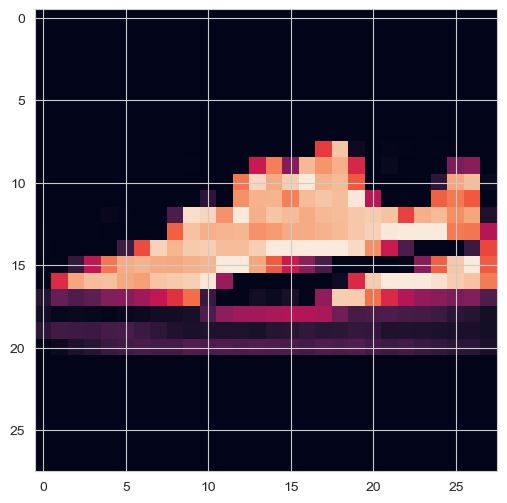

In [200]:
plt.imshow(my_image)
plt.show()

In [206]:
image_prediction = model.predict(my_image.reshape(1, 28, 28, 1))

1/1 [==============================] - 0s 295ms/step


In [207]:
image_prediction

array([[1.1565005e-07, 2.0471232e-08, 3.7741174e-07, 1.3502203e-07,
        5.7509952e-09, 3.1946981e-04, 1.8860890e-08, 9.9965417e-01,
        2.0423644e-05, 5.2708692e-06]], dtype=float32)

In [208]:
np.argmax(image_prediction, axis=1)

array([7])

In [210]:
result = np.argmax(image_prediction, axis=1)
result

array([7])

In [211]:
classes[int(result)]

'Sneaker'

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___